In [1]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
from PIL import Image, ImageOps
import numpy as np
from matplotlib import pyplot as plt

In [35]:
def instantiate_histogram():    
    histArray= []
    
    for i in range(0,256):
        histArray.append(str(i))
        histArray.append(0)
    
    hist = {histArray[i]: histArray[i + 1] for i in range(0, len(histArray), 2)} 
    
    return hist

histogram = instantiate_histogram()


In [36]:
def count_intensity_values(hist, img):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            hist[str(img[row][column])] += 1
     
    return hist



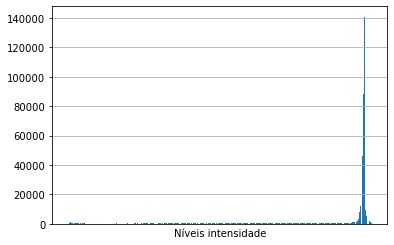

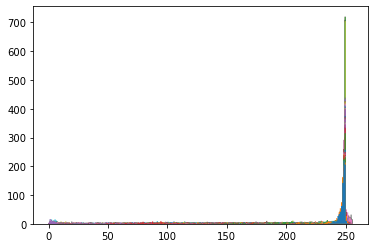

In [37]:
img = Image.open('testeNotafiscal.jpg')
img  = ImageOps.grayscale(img)
imgArray = np.asarray(img)

histogram = count_intensity_values(histogram, imgArray)
def plotHist(hist, hist2=''):
    if hist2 != '':
        figure, axarr = plt.subplots(1,2, figsize=(20, 10))
        axarr[0].bar(hist.keys(), hist.values())
        axarr[1].bar(hist2.keys(), hist2.values())
    else:
        plt.bar(hist.keys(), hist.values())
        plt.xlabel("Níveis intensidade")
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        plt.grid(True)
        plt.show()

plotHist(hist = histogram)

# img.show()

# print(imgArray)

x, bins, p = plt.hist(imgArray,256,[0,256], histtype='stepfilled')
plt.show()

# #print(pytesseract.image_to_string(img))

(791, 500)


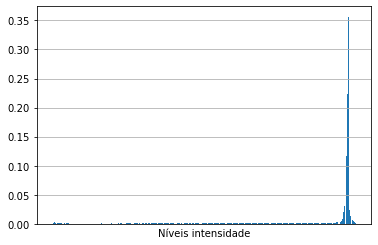

In [38]:
def get_hist_proba(hist, n_pixels):
    hist_proba = {}
    for i in range(0, 256):
        hist_proba[str(i)] = hist[str(i)] / n_pixels
    
    return hist_proba

n_pixels = imgArray.shape[0] * imgArray.shape[1]
print(imgArray.shape)
hist_proba = get_hist_proba(histogram, n_pixels)
plotHist(hist_proba)

In [40]:
def getMediumBrightness(hist, n):
    mediumBright = 0
    
    for i in range(n):
        mediumBright += i*hist[str(i)]
        
    return mediumBright

test = getMediumBrightness(hist_proba,256)

print(test)

228.44178255372947
